In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import re
import csv
import os

In [2]:
data = pd.read_csv("variant_surveillance.tsv", sep = '\t',dtype = {'Variant': 'string',
                                                                 'Is reference?': 'string',
                                                                 'Is complete?': 'string'})
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [3]:
data = data[data['Variant'].notna()]
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [4]:
#specify strings for countries 

vocs_who = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta']

for i in vocs_who:
    
    data.loc[data['Variant'].str.contains(i), 'Variant'] = i




In [5]:
data = data[data['Variant'].isin(['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta'])] 
data.shape

(10131719, 18)

In [6]:
%time
#specify strings for countries 

europe_list = ['Turkey', 'Germany','China' 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
              'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']

# %time
# europe_list = ["Europe", "North America","Oceania", "Asia","South America", "Africa"]
              
for i in europe_list:
    
    data.loc[data['Location'].str.contains(i), 'Location'] = i


#data.loc[data['Location'].str.contains('Turkey'), 'Location'] = 'Turkey'

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 22.6 µs


In [7]:
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",Omicron,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",Omicron,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",Omicron,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",Delta,2021-08-18,Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",Omicron,2022-01-17,Germany,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [8]:
df = data[['Variant','Location','Collection date']]
df.head()

,Variant,Location,Collection date
0,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
1,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
2,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
3,Delta,Turkey,2021-08-18
4,Omicron,Germany,2022-01-17


In [9]:
df['Collection date'] = pd.to_datetime(df["Collection date"])
df.head()

,Variant,Location,Collection date
0,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
1,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
2,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
3,Delta,Turkey,2021-08-18
4,Omicron,Germany,2022-01-17


In [10]:
df['Date']= df['Collection date'].dt.to_period('W')
df.head()

,Variant,Location,Collection date,Date
0,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25,2022-01-24/2022-01-30
1,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25,2022-01-24/2022-01-30
2,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25,2022-01-24/2022-01-30
3,Delta,Turkey,2021-08-18,2021-08-16/2021-08-22
4,Omicron,Germany,2022-01-17,2022-01-17/2022-01-23


In [11]:
df_weekly = df[(df['Collection date'] >= '2020-01-01') & (df['Collection date'] <='2022-05-31')].groupby(['Variant','Location', 'Date']).size().reset_index()
df_weekly.head()

,Variant,Location,Date,0
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1


In [12]:
df_weekly['Date'] = df_weekly['Date'].astype(str)
df_weekly.head()

,Variant,Location,Date,0
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1


In [13]:
df_weekly.columns = ['Variant','Location','Date','Freq']
df_weekly.head()

,Variant,Location,Date,Freq
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1


In [14]:
tmp = df_weekly['Date'].str.split(pat = '/', expand = True)
tmp.head()

,0,1
0,2021-02-15,2021-02-21
1,2021-04-12,2021-04-18
2,2021-04-26,2021-05-02
3,2021-05-03,2021-05-09
4,2021-05-10,2021-05-16


In [15]:
df_weekly2 = pd.merge(df_weekly, tmp.iloc[: , 0], left_index= True, right_index= True)
df_weekly2.head()

,Variant,Location,Date,Freq,0
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [16]:
df_weekly2.Variant.unique()

<StringArray>
[  'Alpha',    'Beta',   'Delta', 'Epsilon',     'Eta',   'Gamma',    'Iota',
   'Kappa',  'Lambda',      'Mu', 'Omicron',   'Theta',    'Zeta']
Length: 13, dtype: string

In [17]:
df_weekly2.columns = ['Variant', 'Location', 'WY-str', 'Freq', 'Date']
df_weekly2.head()

,Variant,Location,WY-str,Freq,Date
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [18]:
df_weekly2['Date'] = pd.to_datetime(df_weekly2['Date'])
df_weekly2.head()

,Variant,Location,WY-str,Freq,Date
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [19]:
df_weekly2.sort_values(by = 'Date')
df_weekly2.head()

,Variant,Location,WY-str,Freq,Date
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [20]:
#claculate weekly sums

df_weekly_sum = df_weekly.groupby(['Variant', 'Date', 'Location'], as_index= False)['Freq'].sum()
df_weekly_sum.head()

,Variant,Date,Location,Freq
0,Alpha,2019-12-30/2020-01-05,Africa / South Africa / Gauteng,1
1,Alpha,2019-12-30/2020-01-05,Asia / India / Kerala,5
2,Alpha,2019-12-30/2020-01-05,Asia / India / Tamil Nadu,1
3,Alpha,2019-12-30/2020-01-05,Austria,4
4,Alpha,2019-12-30/2020-01-05,Europe / Cyprus,21


In [21]:
df_weekly_sum.shape

(93685, 4)

In [22]:
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Epsilon']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Lambda']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Iota']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Kappa']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Mu']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Eta']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Zeta']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Theta']
df_weekly_sum.head(), df_weekly_sum['Variant'].unique()

(  Variant                   Date                         Location  Freq
 0   Alpha  2019-12-30/2020-01-05  Africa / South Africa / Gauteng     1
 1   Alpha  2019-12-30/2020-01-05            Asia / India / Kerala     5
 2   Alpha  2019-12-30/2020-01-05        Asia / India / Tamil Nadu     1
 3   Alpha  2019-12-30/2020-01-05                          Austria     4
 4   Alpha  2019-12-30/2020-01-05                  Europe / Cyprus    21,
 <StringArray>
 ['Alpha', 'Beta', 'Delta', 'Gamma', 'Omicron']
 Length: 5, dtype: string)

### Original one

In [23]:
#clades contains all GISAID clades, VOC contains GISAID clades containing VOCs
#change clade input to whichever you want to analyze
clades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta']
# VOC = ['Delta', 'Omicron']
VOC = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']

clade_input = VOC    ####

#function to generate distance matrix based on quarter, year, and continent
def create_distance_matrix(df,quarter_continent):
    tmp = df['Variant'].str.split('vs', expand=True)
    clade_list = tmp[0].unique()
    distance_matrix = pd.DataFrame(index = clade_list)
    distance_matrix[clade_list] = np.nan
    #fill in distance matrix
    for i in clade_list:
        for j in clade_list:
            if i == j:
                distance_matrix.loc[i,j] = 0
            else:
                distance_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                distance_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    return distance_matrix

#function to generate difference matrix based on quarter, year, and continent
def create_difference_matrix(df,quarter_continent):
    tmp = df['Variant'].str.split('vs', expand=True)
    clade_list = tmp[0].unique()
    difference_matrix = pd.DataFrame(index = clade_list)
    difference_matrix[clade_list] = np.nan
    #fill in difference matrix
    for i in clade_list:
        for j in clade_list:
            if i == j:
                difference_matrix.loc[i,j] = 0
            else:
                difference_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                difference_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    #if row_vs_col is a negative value, make it negative in difference matrix
    for i,v in difference_matrix.iterrows():
        for j in difference_matrix:
            if i != j:
                if (df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
                    difference_matrix.loc[i,j] *= -1
    return difference_matrix

#function to calculate the log transformed ratio of two clades
def transform_ratio(clade_1, clade_2):
    return np.log10(clade_1/clade_2)

def time_frame(df, start_date, end_date):  #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
    for i in dataframe.columns.tolist():
        if dataframe[i].isnull().all():
            dataframe = dataframe.drop(i, axis=1)
    return dataframe


# def time_frame_no_cumsum(df,time_window):
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

def time_frame_no_cumsum(df,start_date, end_date): #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    return dataframe

#function returns slope of clade advantage plots
def slope_calc(day, pairwise_fitness):
    par = np.polyfit(day, pairwise_fitness, 1, full = True)
    slope= par[0][0]
    return slope

def clade_comparisons(df):
    clade_list = [i for i in clade_input if i in df.columns.tolist()]

    df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
    df['days'] = df['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in clade_list:
        for j in clade_list:
            if i != j:
                df['{a} vs {b}'.format(a=i,b=j)] = df.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    clade_list.append('date_ordinal')
    df = df.drop(clade_list, axis=1)
    return df

In [24]:
df_weekly_sum.head()

,Variant,Date,Location,Freq
0,Alpha,2019-12-30/2020-01-05,Africa / South Africa / Gauteng,1
1,Alpha,2019-12-30/2020-01-05,Asia / India / Kerala,5
2,Alpha,2019-12-30/2020-01-05,Asia / India / Tamil Nadu,1
3,Alpha,2019-12-30/2020-01-05,Austria,4
4,Alpha,2019-12-30/2020-01-05,Europe / Cyprus,21


In [25]:
# # Export the DataFrame to a CSV file
# df_weekly_sum.to_csv('dpgr_who_countries_1.csv', index=False)

In [26]:
df_weekly_sum = pd.read_csv('dpgr_who_countries_1.csv')
df_weekly_sum.head()

,Variant,Date,Location,Freq
0,Alpha,2019-12-30/2020-01-05,Africa / South Africa / Gauteng,1
1,Alpha,2019-12-30/2020-01-05,Asia / India / Kerala,5
2,Alpha,2019-12-30/2020-01-05,Asia / India / Tamil Nadu,1
3,Alpha,2019-12-30/2020-01-05,Austria,4
4,Alpha,2019-12-30/2020-01-05,Europe / Cyprus,21


### Original one

In [27]:
# # This function finds the distance matrix among all the clades 

# def automation_mine(country, dataset, start, end):
    
#     df_weekly = dataset[dataset['Location'] == country]
    

#     #pivot dataframe so that index is date and columns are clades
#     df_weekly = df_weekly.pivot(index = 'Date', columns = 'Variant', values = 'Freq')
#     df_weekly = df_weekly.reset_index()
    

#     df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

#     #split date column so we can retrieve month and year
#     tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
#     tmp.columns = ['0','1','2','3']

#     #collection date column contains month and year of each week 
#     df_weekly['Collection date'] = tmp['0']
#     cols = df_weekly.columns.tolist()
#     cols = cols[0:1] + cols[-1:] + cols[1:-1]
#     df_weekly = df_weekly[cols]
# #     print(f"df_weekly : \n {df_weekly.head}")
# #     print(f"df_weekly : \n {df_weekly.columns}")
           
#     #specify time frame to analyze
#     df_sum = time_frame(df_weekly, start, end)
#     # df_sum.to_csv(country+"df_sum"+r'.csv')
# #     print(df_sum)
#     #calculate log comparisons at each week
#     df_ = clade_comparisons(df_sum)
# #     print(df_)
#     # df_.to_csv(country+'_clade_comparison')
#     df_['days'] -= df_['days'].iloc[0]
# #     print(f"df_ :\n {df_}")
# #     print(f"df_ :\n {df_.columns}")
    

#     #calculate slopes, have to disregard nans
#     df_slopes = pd.DataFrame()
#     cols = df_.columns.to_list()
#     df_slopes['Variant'] = cols[3:]
# #     print(df_slopes['Variant'])
#     slopes = []
#     for i,v in enumerate(df_.iloc[:,3:]):
#         tmp = df_[~df_.iloc[:,i+3].isnull()]
#         tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
# #         print(tmp)
#         slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
#         #print(len(slopes))
# #         print(df_slopes)
#     df_slopes['Slope'] = slopes
#     # df_slopes.to_csv(country+"_slope_WHO"+r'.csv')
#     print(df_slopes)
    
# #     dist_mat = create_distance_matrix(df_slopes,'Slope')
# #     # dist_mat.to_csv(country+"_dist_mat_WHO"+r'.csv')
# #     print(f"distance matrix :\n {dist_mat}")

#     #define the file path
#     file_path = f'/scr/mjpantho/Pantho_differential_fitness/Distance_matrix_who/{country + "_" + start + "_" + end + "_dist_mat_who_labels"}.csv'

#     dist_mat = create_distance_matrix(df_slopes,'Slope')
# #     dist_mat.to_csv(file_path, index=True)
#     print(f"Diatance matrix: \n {dist_mat}")
    
#     dif_mat = create_difference_matrix(df_slopes,'Slope')
#     # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
#     # print(f"difference matrix :\n {dif_mat}")

#     #Plot distance matrix as clustermap
#     sns.set(rc = {'figure.figsize':(10, 20)}, font_scale = 1.8)

#     #create distance array from distance matrix
#     distance_array = ssd.squareform(dist_mat) 

#     #create linkage object
#     distance_linkage = hierarchy.linkage(distance_array)
#     print(distance_array.shape)
#     print(dist_mat.shape)

#     #display clustermap
#     g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
#                         cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.087, .03, 0.7))                     
#     # g.fig.set_size_inches(10, 10)
#     # plt.savefig(country+"_clustermap_WHO"+'.jpg', dpi = 300, bbox_inches='tight')
#     return g

### New one

In [28]:
# # #automation function finds the diatance matrix
# automation_mine('USA', df_weekly_sum, start = '2022-03', end = '2023-05', variant_choice_set= {'Delta', 'Omicron'})

In [29]:
# #automation function finds the diatance matrix
# automation_mine('USA', df_weekly_sum, start = '2021-08', end = '2021-09')

*when using this function use the original functions to create the heatmaps*

In [37]:
def scatterplot(country, dataset, start, end, variant):
    
    df_weekly = dataset[dataset['Location'] == country]
    

    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'Date', columns = 'Variant', values = 'Freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])
#     print(df_weekly.head())
    #split date column so we can retrieve month and year
    tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
#     print(tmp.head())
    tmp.columns = ['0','1','2','3']
#     print(tmp.head())

    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
#     print(df_weekly.head())
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly, start, end)
#     df_sum.to_csv(r'df_sum.csv')
#     print(df_sum)
    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
#     print(df_)
    # df_.to_csv(country+'_clade_comparison')
    df_['days'] -= df_['days'].iloc[0]
    #print(df_)
 

    #scatterplot of omicron BA.1 lineage fitness
    sns.set_style("white")
    sns.set(rc = {'figure.figsize':(3,3)})
#     plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)
    pango_compare = [variant] #'Omicron', 'Delta', 'Gamma', 'Beta', 'Alpha'
    marker = ['.', '+', 'v', 'x','*']
    legend=[]
    c=0
    # Create a list to store the slope values and corresponding locations
    slope_values = []
    
    for i in pango_compare:
        if i != 'Omicron': #and i!='Alpha' and i != 'Gamma':# and i!='Delta' and i!='Beta':
            
            mask = ~np.isnan(df_['days']) & ~np.isnan(df_['Omicron vs {0}'.format(i)])
            slope, intercept, r_value, p_value, std_err = stats.linregress(df_['days'][mask],df_['Omicron vs {0}'.format(i)][mask])
#             print('test')
#             print(slope)
#             print(intercept)
            slope_values.append((country, slope))  # Append tuple of location and slope value
            print(slope_values)
            r_squared = r_value ** 2
            print(f"r-squared value: {r_squared}")
            print(f"p-value: {p_value:0.10f}")
            sns.regplot(x=df_['days'], y=df_['Omicron vs {0}'.format(i)], marker=marker[c],scatter_kws={'s':50},label='Omicron vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept), color = 'red')
            # legend.append('BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
        c+=1
        
    '''
    #Save the slope values of corresponding countries to a CSV file
    # Define the file path to save the CSV
    csv_file = 'Omicron_Vs_delta_slope_values_countries.csv'

    # Append the slope values to the CSV file
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(['Location', 'Slope'])  # Write the header row if the file is empty
        writer.writerows(slope_values)  # Append the slope values

    print('Slope values saved to', csv_file)
    '''
    
#     plt.legend(loc='upper left', prop={'size': 11}, facecolor='white', fontsize = 8) 
    plt.legend(loc='upper left', prop={'size': 6}, facecolor='white', frameon=False)
    plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant\ 1}}{\mathrm{Variant\ 2}}\right)$', fontsize=7.5, labelpad=1)
#     plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant}_1}{\mathrm{Variant}_2}\right)$', fontsize=8)
    plt.title(f'Omicron vs Delta\n Time Window: ({start}) - ({end})\nLocation : {country}', fontsize=7.5)
    plt.xlabel('Days', fontsize = 7.5)  # Set x-axis label and adjust font size
    plt.rc('axes', labelsize=7.5)  # Adjust the label font size
    plt.rc('xtick', labelsize=7.5)
    plt.rc('ytick', labelsize=7.5)
    plt.gca().set_facecolor('white')  # Set plot background color to white
    

   
    # Add vertical bars for x-axis and y-axis without changing the range
    plt.axhline(y=plt.ylim()[0], color=(0, 0, 0.1))  # Vertical bar for y-axis
    plt.axvline(x=plt.xlim()[0], color=(0, 0, 0.1))  # Vertical bar for x-axis
 
    
    #Save the figures to `omicron_vs_delta_regression_plots` folder
    import os

    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_vs_delta_regression_plots/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, country + "_regression_Omicron_vs_delta.png")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    # plt.savefig(country+"_slope"+'.png')

# Regression plots `(Country level)` for `Omicron Vs. Delta`

['2022-03', '2022-04', '2022-05']
[('USA', 0.008394026595098511)]
r-squared value: 0.9904753836376425
p-value: 0.0000000002


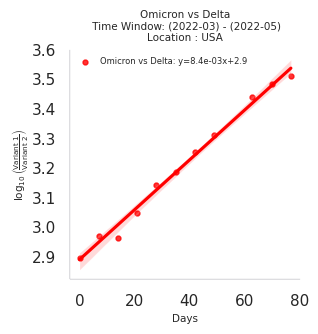

In [38]:
scatterplot('USA', df_weekly_sum, start = '2022-03', end = '2022-05', variant = 'Delta')  #you can pass a list of variants to compare

['2021-11', '2021-12']
[('Turkey', 0.10112420545765761)]
r-squared value: 0.9748356001325932
p-value: 0.0017071813


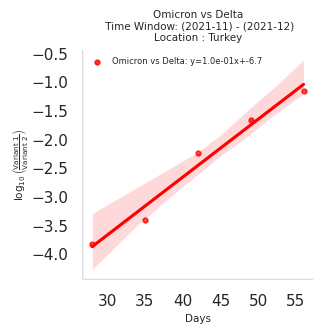

In [39]:
scatterplot('Turkey', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Israel', 0.07490155865596647)]
r-squared value: 0.9708231671558413
p-value: 0.0000498947


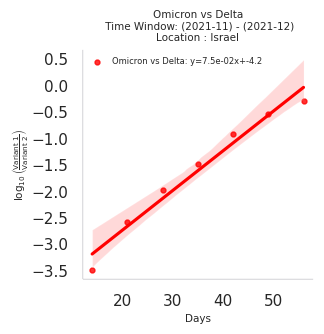

In [40]:
scatterplot('Israel', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Italy', 0.07431804774301878)]
r-squared value: 0.9769292871856922
p-value: 0.0002011518


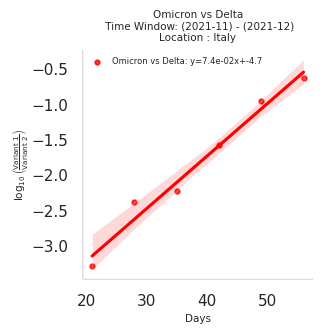

In [41]:
scatterplot('Italy', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Spain', 0.06780974027954316)]
r-squared value: 0.9055202387393714
p-value: 0.0034588120


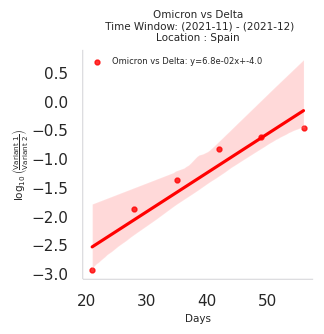

In [42]:
scatterplot('Spain', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Ireland', 0.07342958825234402)]
r-squared value: 0.9281715325404124
p-value: 0.0019830378


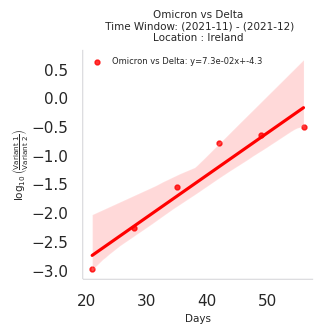

In [43]:
scatterplot('Ireland', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('France', 0.0612355483901909)]
r-squared value: 0.9133881248757203
p-value: 0.0002099997


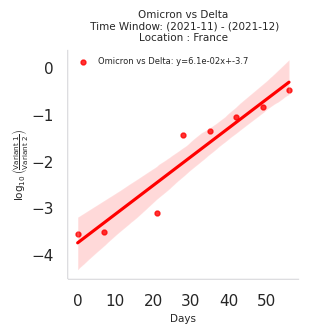

In [44]:
scatterplot('France', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-12', '2022-01']
[('Germany', 0.0291975838004124)]
r-squared value: 0.9599757848960592
p-value: 0.0000037926


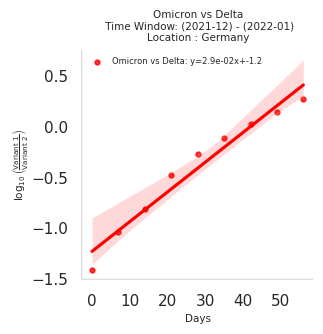

In [45]:
scatterplot('Germany', df_weekly_sum, start = '2021-12', end = '2022-01', variant = 'Delta')

['2021-12', '2022-01']
[('Denmark', 0.02767474570280313)]
r-squared value: 0.9449201710809226
p-value: 0.0000116662


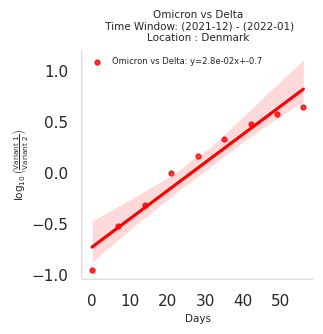

In [46]:
scatterplot('Denmark', df_weekly_sum, start = '2021-12', end = '2022-01', variant = 'Delta')

['2021-11', '2021-12', '2022-01']
[('South Korea', 0.0359470373161788)]
r-squared value: 0.9028703326316512
p-value: 0.0000074797


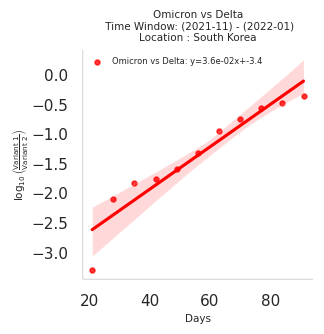

In [47]:
scatterplot('South Korea', df_weekly_sum, start = '2021-11', end = '2022-01', variant = 'Delta')

['2021-11', '2021-12']
[('France', 0.0612355483901909)]
r-squared value: 0.9133881248757203
p-value: 0.0002099997


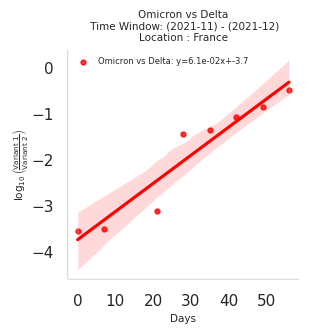

In [48]:
scatterplot('France', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-12', '2022-01']
[('Japan', 0.040166855443601254)]
r-squared value: 0.9387733342789222
p-value: 0.0000169371


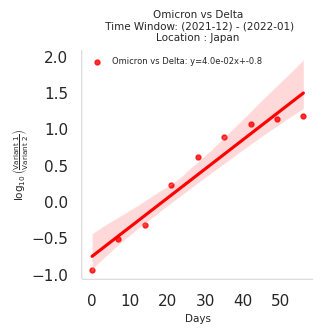

In [49]:
scatterplot('Japan', df_weekly_sum, start = '2021-12', end = '2022-01', variant = 'Delta')

['2021-11', '2021-12']
[('Netherlands', 0.058998029063608105)]
r-squared value: 0.8982445313582103
p-value: 0.0003426374


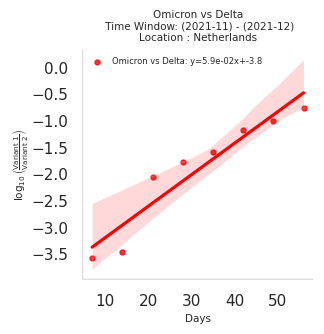

In [50]:
scatterplot('Netherlands', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Switzerland', 0.07136890825380293)]
r-squared value: 0.9096533850844153
p-value: 0.0008614151


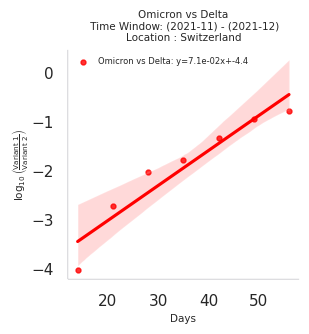

In [51]:
scatterplot('Switzerland', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Poland', 0.095231595784638)]
r-squared value: 0.9984124099499425
p-value: 0.0007941103


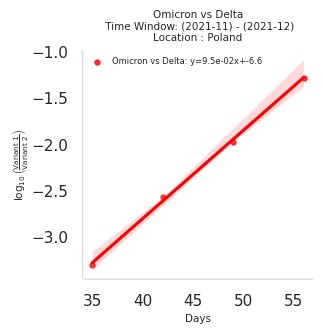

In [52]:
scatterplot('Poland', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Mexico', 0.0708878064028956)]
r-squared value: 0.9614026039972525
p-value: 0.0001007758


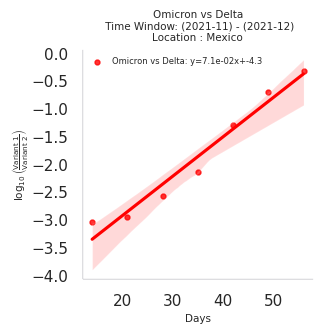

In [53]:
scatterplot('Mexico', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Brazil', 0.07665001171846936)]
r-squared value: 0.9893764438852504
p-value: 0.0000424733


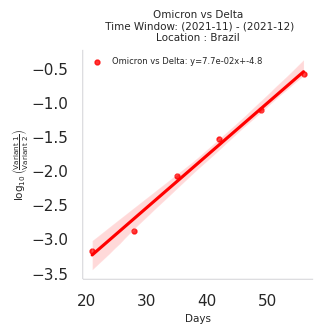

In [54]:
scatterplot('Brazil', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-11', '2021-12']
[('Canada', 0.06875782180615861)]
r-squared value: 0.9442796576622899
p-value: 0.0000121512


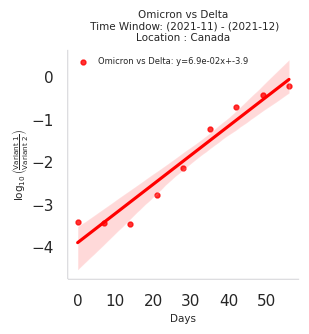

In [55]:
scatterplot('Canada', df_weekly_sum, start = '2021-11', end = '2021-12', variant = 'Delta')

['2021-12', '2022-01']
[('Belgium', 0.02390055267045942)]
r-squared value: 0.967830112976827
p-value: 0.0000017600


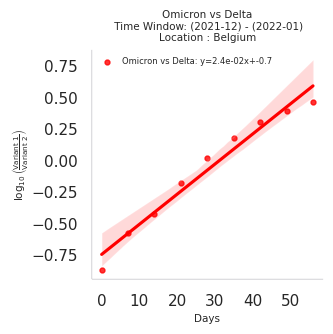

In [56]:
scatterplot('Belgium', df_weekly_sum, start = '2021-12', end = '2022-01', variant = 'Delta')

# `Bar Plot` of the slope values in diffeerent `Countries`

In [50]:
slope_values_of_countries = pd.read_csv('Omicron_Vs_delta_slope_values_countries.csv')
print(slope_values_of_countries)

       Location     Slope
0        Turkey  0.101124
1           USA  0.008394
2        Turkey  0.101124
3        Turkey  0.101124
4        Israel  0.074902
5         Italy  0.074318
6         Spain  0.067810
7       Ireland  0.073430
8        France  0.061236
9       Germany  0.029198
10      Denmark  0.027675
11  South Korea  0.035947
12       France  0.061236
13        Japan  0.040167
14  Netherlands  0.058998
15  Switzerland  0.071369
16       Poland  0.095232
17       Mexico  0.070888
18       Brazil  0.076650
19       Canada  0.068758
20      Belgium  0.023901


In [51]:
slope_values_of_countries = slope_values_of_countries.drop_duplicates()
print(slope_values_of_countries.describe())
print("\n")

# Find the minimum and maximum slope values
min_slope_value = slope_values_of_countries['Slope'].min()
max_slope_value = slope_values_of_countries['Slope'].max()

# Find the corresponding countries for the minimum and maximum slope values
min_slope_countries = slope_values_of_countries[slope_values_of_countries['Slope'] == min_slope_value]['Location']
max_slope_countries = slope_values_of_countries[slope_values_of_countries['Slope'] == max_slope_value]['Location']

# Print the results
print(f"Min Slope Value: {min_slope_value}")
print(f"Country: {', '.join(min_slope_countries)}")
print("\n")
print(f"Max Slope Value: {max_slope_value}")
print(f"Country: {', '.join(max_slope_countries)}")
print("\n")
print(f"Average Slope Value: {slope_values_of_countries['Slope'].mean()}")


           Slope
count  18.000000
mean    0.058889
std     0.025570
min     0.008394
25%     0.037002
50%     0.068284
75%     0.074096
max     0.101124


Min Slope Value: 0.0083940265950985
Country: USA


Max Slope Value: 0.1011242054576576
Country: Turkey


Average Slope Value: 0.05888853685204704


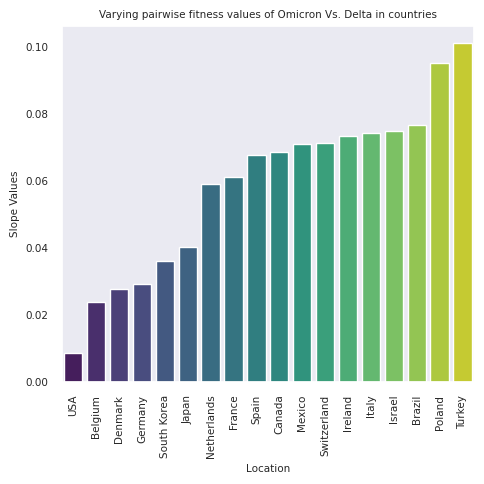

In [52]:
# Sort the DataFrame by 'Slope' column in ascending order
slope_values_of_countries = slope_values_of_countries.sort_values('Slope', ascending=True)

# Define the color palette
color_palette = sns.color_palette('viridis', len(slope_values_of_countries))

# Plot the bar plot with the specified color palette
plt.figure(figsize=(5, 5))
sns.barplot(x='Location', y='Slope', data=slope_values_of_countries, palette=color_palette)
plt.xlabel('Location', fontsize = 7.5)
plt.ylabel('Slope Values', fontsize = 7.5)
plt.title('Varying pairwise fitness values of Omicron Vs. Delta in countries', fontsize = 7.5)
plt.xticks(rotation=90)
plt.grid(False)  # Turn off the grid lines
plt.tight_layout()

# Specify the directory path
directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_vs_delta_regression_plots/"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the figure to the specified directory with DPI set to 300
filename = os.path.join(directory, "countries_bar_plot_Omicron_vs_delta.png")
plt.savefig(filename, dpi=300, bbox_inches="tight")

# Display the figure
plt.show()


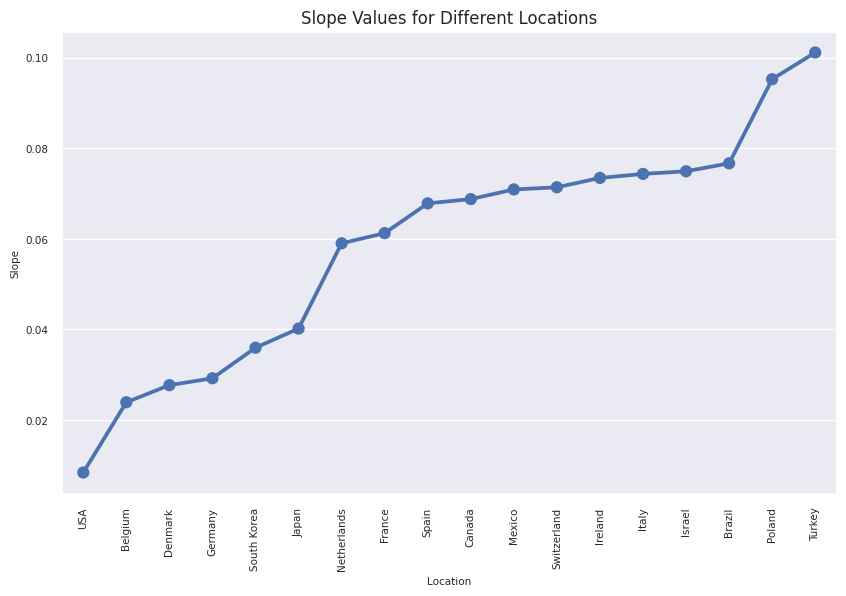

In [53]:
# Create the point plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.pointplot(x='Location', y='Slope', data=slope_values_of_countries)

# Customize the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Location')
plt.ylabel('Slope')
plt.title('Slope Values for Different Locations')

# Show the plot
plt.show()